In [1]:
# import the necessary libraries
import pandas as pd
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired


In [2]:
# load the topic model from the directory
topic_model = BERTopic.load("/Users/durana/Documents/FacadeAI/git_topic_model/topic_model/safetensors")


#### The pre-trained topic model returns 13 topics. These topics are merged to form the higher-level topics we defined: architecture, environment, and structure.

In [3]:
topic_model.get_topic_info()[['Topic', 'Count', 'Representation', 'KeyBERT']]


,Topic,Count,Representation,KeyBERT
0,-1,22,"[color, urban, urban color, images, energy, le...","[urban color planning, urban color, thermal im..."
1,0,130,"[design, energy, learning, thermal, envelope, ...","[energy consumption, machine learning, optimiz..."
2,1,47,"[parsing, segmentation, learning, deep, networ...","[semantic segmentation, convolutional neural, ..."
3,2,40,"[inspection, crack, learning, detection, image...","[crack detection, computer vision, deep learni..."
4,3,26,"[point, 3d, cloud, point cloud, features, extr...","[point cloud, point clouds, tomosar point clou..."
5,4,22,"[urban, street, images, street view, city, vie...","[street level imagery, street view images, goo..."
6,5,19,"[detection, feature, recognition, image, probl...","[recognition urban environments, computer visi..."
7,6,10,"[inpainting, image, loss, network, image inpai...","[inpainting network, image inpainting, object ..."
8,7,10,"[oblique, point, points, aerial, classificatio...","[point cloud, point clouds, photogrammetric po..."
9,8,9,"[thermal, infrared, anomaly, images, anomalies...","[thermographic images, thermography, thermogra..."


In [4]:
# load abstracts used in training
data = pd.read_csv('/Users/durana/Documents/FacadeAI/git_notebooks/data_to_reproduce_topics.csv')
abstracts = data['Abstract'].to_list()
data.head()


,Abstract,Article Title
0,This paper describes a new approach for image-...,Image-based thermographic modeling for assessi...
1,Architectural styles and their evolution are c...,Understanding architecture age and style throu...
2,Developing a classifier to identify the defect...,Semi-supervised learning based on convolutiona...
3,Building facades elements detection plays a ke...,Deep learning for detecting building facade el...
4,Energy consumption simulation and renovation o...,A deep learning method for building facade par...


In [5]:
# merge topics
topics_to_merge = [[0, 11], #environmental
                   [1, 3, 4, 5, 6, 7, 9, 12], #architectural
                   [2, 10, 8]] #structural
topic_model.merge_topics(abstracts, topics_to_merge)


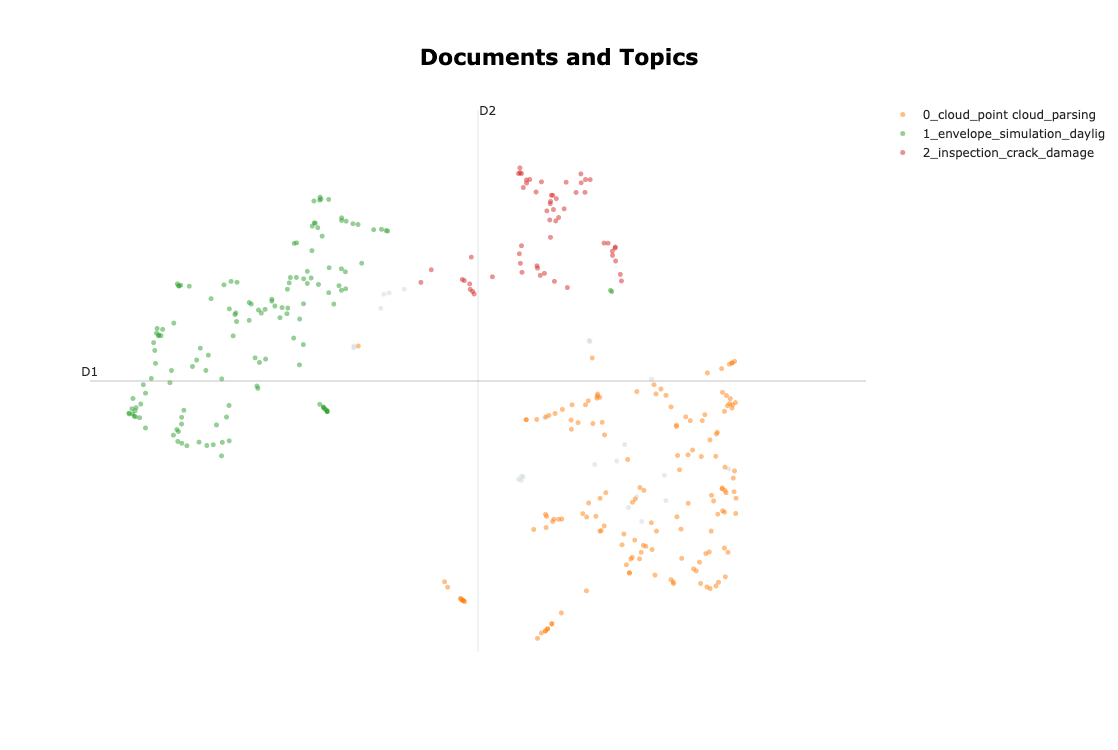

In [11]:
# visualize topics (figure 14)
topic_model.visualize_documents(
    abstracts,
    custom_labels = False,
    hide_annotations=True)


#### Test your abstract:

The example abstract is from Li et al. [1].

[1] Li, Q., Zhang, L., Wang, X., & Su, X. (2024). Daylighting and energy performance of window with transparent insulation slats combined with building shading in the hot-summer and cold-winter zone. Sustainable Cities and Society, 105772. https://doi.org/10.1016/j.scs.2024.105772

In [16]:
# Paste your abstract as text
abstract = ["The shading from surrounding buildings significantly affects the energy and daylighting performance of transparent insulation materials (TIM) systems. In previous studies, the performance of TIM systems was primarily discussed in ideal situations without considering the influence of surrounding buildings. However, this is not realistic in actual urban scenarios. This study presents a case study conducted in Changsha to evaluate and compare the energy and daylighting performance of the window with transparent insulation slats (WTIS) and normal double glazing (NDG). The study considers the varying degrees of building shading effects. The results show that windows facing west exhibit the best energy efficiency, while windows facing south have the worst. WTIS achieves a higher Useful Daylight Illuminance (UDI) when building shading effects are not significant, whereas NDG achieves a higher UDI when building shading effects are significant. Despite increasing lighting energy consumption by 69.8% to 84.3%, WTIS consistently outperforms NDG in terms of total energy savings. Furthermore, strategically utilizing or deactivating WTIS according to recommended periods during winter can enhance the total solar gain for the building by approximately 22.3%. This study provides valuable recommendations for the application of WTIS systems and the design of buildings in the hot-summer and cold-winter zone."
           ]


In [17]:
# Assign topics to the abstract
topic = topic_model.transform(abstract)


In [20]:
topic_lib = {-1:'can not fit into the predefined topics', 
             0:'about ARCHITECTURAL design', 
             1:'about ENVIRONMENTAL design', 
             2:'about STRUCTURAL design'}


In [21]:
print('The topic of the following abstract is most likely', topic_lib[topic[0][0]], ':\n', abstract[0])


The topic of the following abstract is most likely about ENVIRONMENTAL design :
 The shading from surrounding buildings significantly affects the energy and daylighting performance of transparent insulation materials (TIM) systems. In previous studies, the performance of TIM systems was primarily discussed in ideal situations without considering the influence of surrounding buildings. However, this is not realistic in actual urban scenarios. This study presents a case study conducted in Changsha to evaluate and compare the energy and daylighting performance of the window with transparent insulation slats (WTIS) and normal double glazing (NDG). The study considers the varying degrees of building shading effects. The results show that windows facing west exhibit the best energy efficiency, while windows facing south have the worst. WTIS achieves a higher Useful Daylight Illuminance (UDI) when building shading effects are not significant, whereas NDG achieves a higher UDI when building sh